In [2]:
# import statements
import csv
import pprint
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
% matplotlib inline
import calendar
import datetime

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

referrals = pd.read_csv('Werner_CLC_Referrals.csv')
referrals.head()

,Date,Impressions,Click-Throughs
0,1/1/17 0:00,1087,13
1,1/2/17 0:00,1440,17
2,1/3/17 0:00,2141,19
3,1/4/17 0:00,1882,13
4,1/5/17 0:00,1883,11


In [4]:
referrals.tail()

,Date,Impressions,Click-Throughs
360,12/27/17 0:00,916,18
361,12/28/17 0:00,893,22
362,12/29/17 0:00,727,13
363,12/30/17 0:00,535,11
364,12/31/17 0:00,401,19


In [5]:
referrals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
Date              365 non-null object
Impressions       365 non-null int64
Click-Throughs    365 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.6+ KB


In [6]:
# Total 2018 Impressions on Werner Ladder Page with CityLadder referall logo
referrals['Impressions'].sum()

413648

In [7]:
# Total 2018 Click-Throughs to City Ladder online store from Werner
referrals['Click-Throughs'].sum()

7186

In [8]:
# Click Through Rate (CTR) from Werner to CityLadder
referrals['Click-Throughs'].sum() / referrals['Impressions'].sum()

0.01737225853866089

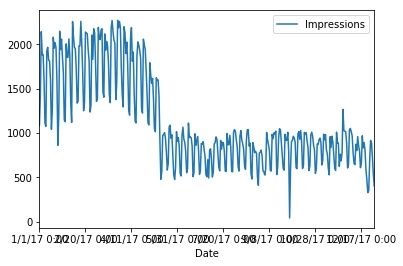

In [20]:
# plt.plot(referrals['Impressions'])
# plt.show;
referrals.plot.line(x='Date', y='Impressions')

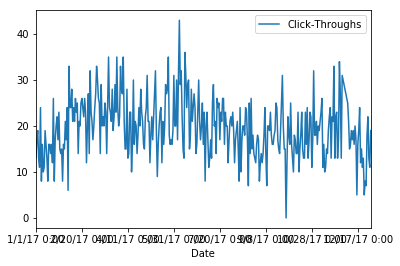

In [21]:
referrals.plot.line(x='Date', y='Click-Throughs')

In [ ]:
# read in file of impressions by product for Q1 2017
q1_impressions = pd.read_csv('Q1_impressions.csv')
q1_impressions.head()

In [ ]:
q1_impressions.info()

In [ ]:
# read in file of impressions by product for Q2 2017
q2_impressions = pd.read_csv('Q2_impressions.csv')
q2_impressions.head()

In [ ]:
# Note that we added about 20 products in Q2 - that's why we have more rows here
q2_impressions.info()

In [ ]:
# read in file of impressions by product for Q3 2017
q3_impressions = pd.read_csv('Q3_impressions.csv')
q3_impressions.head()

In [ ]:
q3_impressions.info()

In [ ]:
# read in file of impressions by product for Q4 2017
q4_impressions = pd.read_csv('Q4_impressions.csv')
q4_impressions.head()

In [ ]:
q4_impressions.info()

In [ ]:
dfx = pd.merge(q1_impressions,q2_impressions,on='SKU',suffixes=('_q1', '_q2'),how='right')
dfx.info()
dfx = dfx[['SKU','Name_q2','Q1','Q2']]
dfx.rename(columns={'Name_q2':'Name'}, inplace=True)
dfx.head()

In [ ]:
# Merge the quarterly impressions data into a single dataframe
df = pd.merge(pd.merge(pd.merge(q1_impressions,q2_impressions,on='SKU',how='right',suffixes=('_q1', '_q2')),\
              q3_impressions,on='SKU',how='right',suffixes=('_q12', '_q3')),q4_impressions,on='SKU',how='left',suffixes=('_q3', '_q4'))
df.info()
df.head()

In [ ]:
# Trim the dataframe down to the necessary columns
impressions_2017 = df[['SKU','Name_q3', 'Q1', 'Q2', 'Q3','Q4']]
impressions_2017.rename(columns={'Name_q3':'Name'}, inplace=True)
impressions_2017.info()

In [ ]:
impressions_2017.head()

In [ ]:
# impressions_merged['Total']= impressions_merged['Q1']+ impressions_merged['Q2']+ impressions_merged['Q3']
impressions_2017['Total']= impressions_2017.apply(lambda row: row['Q1'] + row['Q2'] + row ['Q3'] + row['Q4'],axis=1)
impressions_2017 = impressions_2017.sort_values('Total', ascending=False)
impressions_2017 = impressions_2017.reset_index(drop=True)

In [ ]:
# Top 20 products by total impressions on Werner Site
impressions_2017.head(20)

In [ ]:
# read in quarterly files of click throughs (to cityladderco.com) by product
q1_clicks = pd.read_csv('Q1_clicks.csv')
q1_clicks.head()

In [ ]:
q1_clicks.info()

In [ ]:
q2_clicks = pd.read_csv('Q2_clicks.csv')
q2_clicks.head()

In [ ]:
q2_clicks.info()

In [ ]:
q3_clicks = pd.read_csv('Q3_clicks.csv')
q3_clicks.head()

In [ ]:
q3_clicks.info()

In [ ]:
q4_clicks = pd.read_csv('Q4_clicks.csv')
q4_clicks.head()

In [ ]:
q4_clicks.info()

In [ ]:
# merge the click-through dataframes and trim the resulting larger dataframe
df = pd.merge(pd.merge(pd.merge(q1_clicks,q2_clicks,on='SKU',how='outer',suffixes=('_q1', '_q2')),\
              q3_clicks,on='SKU',how='outer',suffixes=('_q12', '_q3')),q4_clicks,on='SKU',how='outer',suffixes=('_q3', '_q4'))
# df.info()
# df
clicks_2017 = df[['SKU','Name_q2', 'Q1', 'Q2', 'Q3', 'Q4']]
clicks_2017.rename(columns={'Name_q2':'Name'}, inplace=True)

In [ ]:
clicks_2017.head()

In [ ]:
# Sum and sort 2017 clicks by total
clicks_2017['Total']= clicks_2017.apply(lambda row: row['Q1'] + row['Q2'] + row ['Q3']+ row ['Q4'], axis=1)
clicks_2017 = clicks_2017.sort_values('Total', ascending=False)
clicks_2017 = clicks_2017.reset_index(drop=True)

In [ ]:
# Top 20 products by click-throughs from Werner
clicks_2017.head(20)